In [6]:
# Data Contain around 1000 images of each rice namely Ipsala, Basmati,Arborio,Karacadag


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!ls '/content/drive/My Drive/CVAssignment3/Rice/'

Arborio  Basmati  Ipsala  Karacadag


In [9]:
dataset_path = '/content/drive/My Drive/CVAssignment3/Rice/'

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

**Load the Data**

In [11]:
# lists to hold data

images = []
labels = []

In [12]:
# listing all folder names in the specified path
folders = os.listdir(dataset_path)
folders

['Arborio', 'Basmati', 'Karacadag', 'Ipsala']

In [13]:
# Creating dictionaries to map folder names

name_mapping_dict = {
                     'Arborio': 0,
                     
                     'Basmati': 1,
                     'Karacadag':2
                     ,'Ipsala':3
                     }


inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}

print(inv_name_mapping_dict)

{0: 'Arborio', 1: 'Basmati', 2: 'Karacadag', 3: 'Ipsala'}


In [14]:
# Setting image size
img_size = 256

**Pre-process dataset**

In [15]:
# looping through each folder and getting images and creating labels
for folder in folders:
  print(f'Processing folder: {folder}')
  filenames = os.listdir(dataset_path+folder+'/')
  count=0
  for fname in filenames:
    count=count+1
    img = plt.imread(dataset_path+folder+'/'+fname)
    img = cv2.resize(img, (img_size, img_size))
    images.append(img)
    labels.append(name_mapping_dict[folder])
  print(count)

Processing folder: Arborio
264
Processing folder: Basmati
273
Processing folder: Karacadag
234
Processing folder: Ipsala
296


In [16]:
# Converting lists to numpy arrays for easy matrix operations
images = np.array(images)
labels = np.array(labels)

In [17]:
print('images shape : ', images.shape)
print('labels shape : ', labels.shape)

images shape :  (1067, 256, 256, 3)
labels shape :  (1067,)


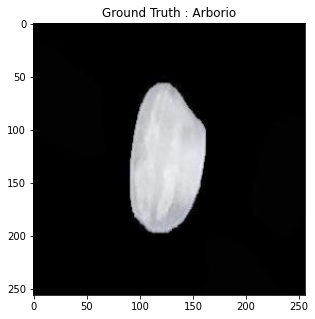

In [18]:
# Plotting samples from data to check if data has been read successfully
img_number = 65
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

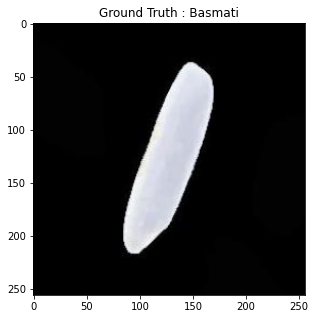

In [19]:
# Plotting samples from data to check if data has been read successfully
img_number = 339
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

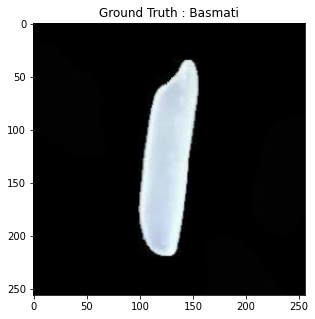

In [20]:
# Plotting samples from data to check if data has been read successfully
img_number = 306
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

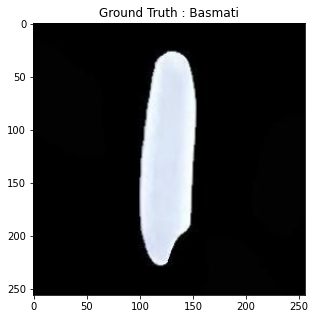

In [21]:
# Plotting samples from data to check if data has been read successfully
img_number = 450
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

In [22]:
# Find the unique numbers from the train labels
classes = np.unique(labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  4
Output classes :  [0 1 2 3]


In [23]:
# Normalize training image pixels
images = np.array(images) / 255

In [24]:
# Change the labels from integer to categorical data
labels_one_hot = to_categorical(labels)

In [25]:
labels[303]

1

In [26]:
labels_one_hot[303]

array([0., 1., 0., 0.], dtype=float32)

**Shuffling and Splittng Dataset**

In [27]:
# Shuffling and Splittng Dataset
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.10, shuffle=True, random_state=0)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (960, 256, 256, 3) (960, 4)
Testing data shape :  (107, 256, 256, 3) (107, 4)


**Design the Network Architecure for Convolutional Neural Network**

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten 

# Same padding: This padding ensures that the output layer has the same size as the input layer
model = Sequential()
model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(img_size, img_size, 3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())


model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(classes_num, activation="softmax"))



**Configure the model training time parameters**

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Train the Model**

In [35]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=8, verbose=1, 
                   validation_data=(test_images, test_labels))

Epoch 1/8
8/8 [==============================] - 94s 12s/step - loss: 0.7832 - accuracy: 0.6417 - val_loss: 0.2215 - val_accuracy: 0.8972
Epoch 2/8
8/8 [==============================] - 72s 9s/step - loss: 0.1174 - accuracy: 0.9635 - val_loss: 0.0788 - val_accuracy: 0.9626
Epoch 3/8
8/8 [==============================] - 86s 11s/step - loss: 0.0752 - accuracy: 0.9729 - val_loss: 0.2100 - val_accuracy: 0.9346
Epoch 4/8
8/8 [==============================] - 74s 9s/step - loss: 0.0545 - accuracy: 0.9781 - val_loss: 0.0364 - val_accuracy: 0.9813
Epoch 5/8
8/8 [==============================] - 72s 9s/step - loss: 0.0310 - accuracy: 0.9896 - val_loss: 0.0459 - val_accuracy: 0.9813
Epoch 6/8
8/8 [==============================] - 72s 9s/step - loss: 0.0218 - accuracy: 0.9917 - val_loss: 0.0868 - val_accuracy: 0.9533
Epoch 7/8
8/8 [==============================] - 71s 9s/step - loss: 0.0220 - accuracy: 0.9937 - val_loss: 0.1090 - val_accuracy: 0.9533
Epoch 8/8
8/8 [========================

**Evaluate the Trained Model on Testing Data**

In [36]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc*100))

4/4 [==============================] - 2s 486ms/step - loss: 0.1093 - accuracy: 0.9626
Evaluation result on Test Data : Loss = 0.10929975658655167, accuracy = 96.26168012619019


**Save Trained Model**

In [37]:
model_path = '/content/drive/My Drive/CVAssignment3/'

model.save(model_path+'my_model.h5')

**Display Loss and Accuracy Plots**

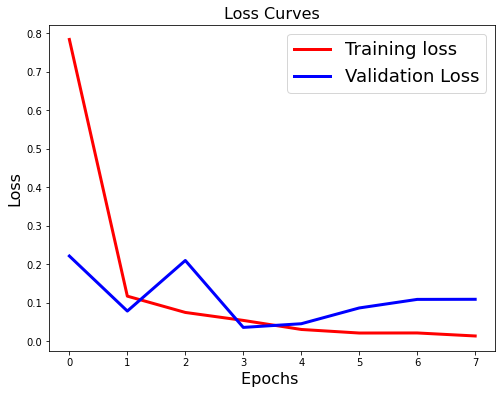

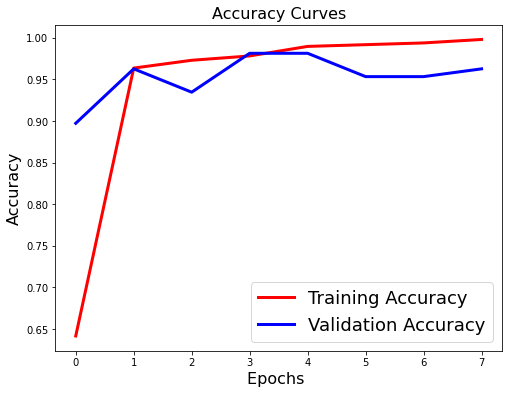

In [38]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

**Test the Trained Model on Testing Data: <br/>Testing a single image**

Model prediction: Ipsala


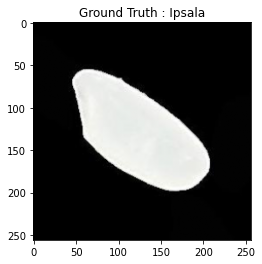

In [39]:
# Predict the most likely class
test_img_number = 7

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Karacadag


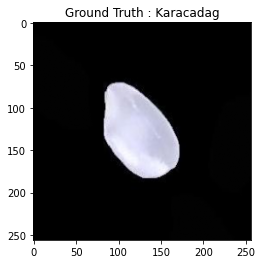

In [40]:
# Predict the most likely class
test_img_number = 20

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Arborio


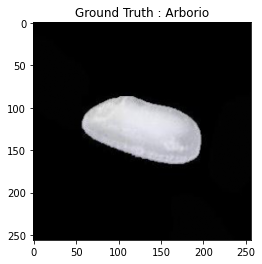

In [41]:
# Predict the most likely class
test_img_number = 15

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Basmati


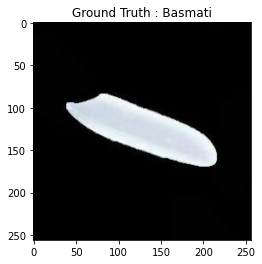

In [42]:
# Predict the most likely class
test_img_number = 21

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Arborio


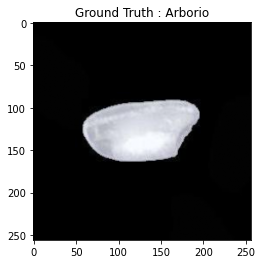

In [43]:
# Predict the most likely class
test_img_number = 34

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Karacadag


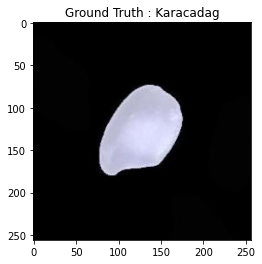

In [44]:
# Predict the most likely class
test_img_number = 40

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Basmati


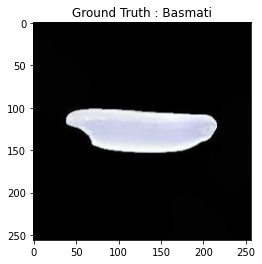

In [45]:
# Predict the most likely class
test_img_number = 42

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Ipsala


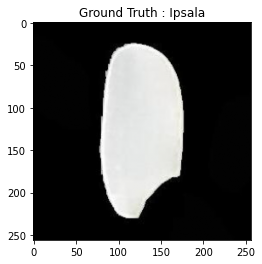

In [46]:
# Predict the most likely class
test_img_number = 43

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Karacadag


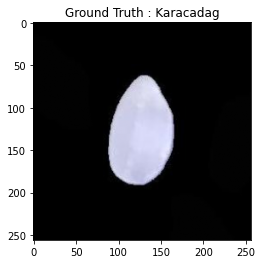

In [47]:
# Predict the most likely class
test_img_number = 44

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Ipsala


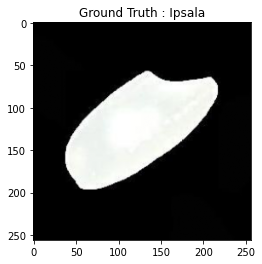

In [48]:
# Predict the most likely class
test_img_number = 30

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Karacadag


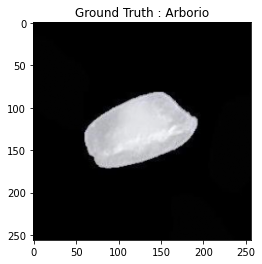

In [49]:
# Predict the most likely class
test_img_number = 14

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Basmati


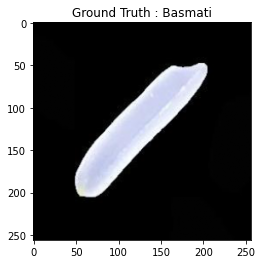

In [50]:
# Predict the most likely class
test_img_number = 29

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Basmati


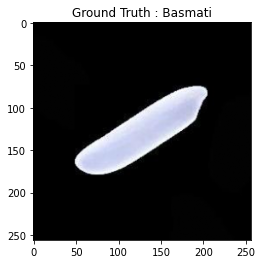

In [51]:
# Predict the most likely class
test_img_number = 32

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()